In [1067]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [1140]:
path_1 = "../Project 1 Data/Violence Project 66-22/Full_Data.csv"
path_2 = "../Project 1 Data/Violence Project 66-22/Firearms_Data.csv"
path_3 = "../Project 1 Data/Violence Project 66-22/Trend_Data.csv"
path_4 = "../Project 1 Data/Violence Project 66-22/Community_Data.csv"
path_5 = "../Project 1 Data/Violence Project 66-22/Victims_Data.csv"
fire_data = pd.read_csv(path_2)
full_data = pd.read_csv(path_1)
trend_data = pd.read_csv(path_3)
com_data = pd.read_csv(path_4)
vict_data = pd.read_csv(path_5)

In [122]:
full_data

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Shooting Location Address,City,State,State Code,Region,Urban/Suburban/Rural,Location,Insider / Outsider,Workplace shooting,Multiple Locations,Other Location,Armed Person on Scene,Specify Armed Person,Number Killed,Number Injured,Family Member Victim,Romantic Partner Victim,Kidnapping or Hostage Situation,Age,Gender,Race,Immigrant,Sexual Orientation,Religion,Education,School Performance,School Performance Specified,Birth Order,Number of Siblings,Older Siblings,Younger Siblings,Relationship Status,Children,Employment Status,Employment Type,Military Service,Military Branch,Community Involvement,Community Involvement Specified,Known to Police or FBI,Criminal Record,Part I Crimes,Part II Crimes,Highest Level of Criminal Justice Involvement,History of Physical Altercations,History of Animal Abuse,History of Domestic Abuse,Domestic Abuse Specified,History of Sexual Offenses,Gang Affiliation,Terror Group Affiliation,Known Hate Group or Chat Room Affiliation,Violent Video Games,Bully,Bullied,Raised by Single Parent,Parental Divorce / Separation,Parental Death in Childhood,Parental Suicide,Childhood Trauma,Physically Abused,Sexually Abused,Emotionally Abused,Neglected,Childhood SES,Mother Violent Treatment,Parental Substance Abuse,Parent Criminal Record,Family Member Incarcerated,Adult Trauma,Recent or Ongoing Stressor,Signs of Being in Crisis,Timeline of Signs of Crisis,Signs of Crisis Expanded,Inability to Perform Daily Tasks,Notably Depressed Mood,Unusually Calm or Happy,Rapid Mood Swings,Increased Agitation,Abusive Behavior,Isolation,Losing Touch with Reality,Paranoia,Suicidality,Prior Hospitalization,Voluntary or Involuntary Hospitalization,Prior Counseling,Voluntary or Mandatory Counseling,Psychiatric Medication,Psychiatric Medication Specified,Treatment 6 Months Prior to Shooting,Mental Illness,Known Family Mental Health History,Autism Spectrum,Substance Use,Health Issues,Health Issues - Specify,Head Injury / Possible TBI,Known Prejudices,Motive: Racism/Xenophobia,Motive: Religious Hate,Motive: Misogyny,Motive: Homophobia,Motive: Employment Issue,Motive: Economic Issue,Motive: Legal Issue,Motive: Relationship Issue,Motive: Interpersonal Conflict,Motive: Fame-Seeking,Motive: Other,Motive: Unknown,Role of Psychosis in the Shooting,Social Media Use,Leakage,Leakage How,Leakage Who,Leakage Specific/Nonspecific,Interest in Past Mass Violence,Relationship with Other Shooting(s),Specify Relationship to Other Shooting(s),Legacy Token,Pop Culture Connection,Specify Pop Culture Connection,Planning,Performance,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,Specify Other Weapons or Gear,On-Scene Outcome,Attempt to Flee,Insanity Defense,Criminal Sentence
0,1,Whitman,Charles,8/1/66,Monday,1,8,1966,"110 Inner Campus Drive, Austin, TX 78705",Austin,TX,43,0,0,1,1,0,1,7.0,1,2.0,15,31,1.0,1.0,0,25.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.9 GPA,1.0,2.0,0.0,2.0,2.0,0.0,0.0,NaN,1.0,3.0,3.0,formerly an altar boy and Eagle Scout,0.0,1.0,0,9,4.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,6,4,1.0,2.0,"A few months before the shooting, he saw a psy...",1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1,0.0,NaN,1.0,1,0,0.0,3,1.0,brain tumor,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0,0,1,0.0,1.0,Robert Smith killed 5 people a few months afte...,1.0,0.0,NaN,1.0,0.0,1.0,3.0,7.0,1.0,"hatchet, hammer, knives, wrench, ropes, water,...",1.0,0.0,2.0,0.0
1,2,Smith,Robert,11/12/66,Saturday,12,11,1966,"Rose-Mar College of Beauty in Mesa, AZ",Mesa,AZ,3,3,0,4,0,0,0,NaN,0,0.0,5,2,0.0,0.0,0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,"good grades, on student council",1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1.0,3.0,"A few years before the shooting, he becam

In [931]:
mayra = full_data.copy()
mayra = mayra['Full Date']
mayra = pd.to_datetime(mayra)
mayra = mayra.to_frame()
#mayra = mayra.apply(lambda d: d.day() )
#df['time'] = df['date'].dt.strftime('%H:%M:%S')
#mayra = mayra.datetime.datetime('%Y')
#mayra = mayra.dt.year()
# mayra

In [6]:
#Mayra's Definition of Mass Shooting: Incident of 5 or more deaths
#My definition: 4 or more deaths and/or injuries (not including the shooter)
#My Question's: Do more or less shootings happen with a registered or unregistered firearm?
#What time of the day do most shootings happen?
#Where do most shootings take place?
#Which factors had a greater impact on the number of injured/fatal deaths

In [748]:
#Declaring codes for location column:
#K-12 school = 0, College/university = 1, Government building / place of civic importance = 2,
#House of worship = 3, Retail = 4, Restaurant/bar/nightclub = 5, Office = 6, Place of residence = 7,
#Outdoors = 8, Warehouse/factory = 9, Post office = 10
location = full_data.copy()
#location = full_data['Location']
location['Location'].replace({0:"School (K-12)",
                              1:"College/University",
                              2:"Government building",
                              3:"House of worship",
                              4:"Retail",
                              5:"Restaurant/Bar/Club",
                              6:"Offiice",
                              7:"Place of residence",
                              8:"Outdoors",
                              9:"Warehouse/Factory",
                              10:"Post Office"},inplace=True)
#loc_codes = location.count_values()
loc_num = location["Location"].value_counts()
loc_num

Retail                 35
Warehouse/Factory      25
Restaurant/Bar/Club    25
Offiice                18
Place of residence     16
Outdoors               15
School (K-12)          14
House of worship       11
College/University      9
Government building     9
Post Office             4
Name: Location, dtype: int64

In [775]:
col_list = sns.color_palette()
col_list

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Text(0.5, 0, 'Incident Count')

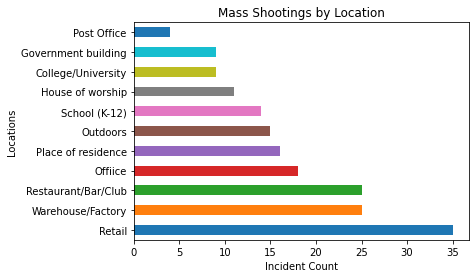

In [960]:
#loc_num.to_frame()
#loc_num = loc_num.reset_index()
#loc_num
#sns.countplot(data=loc_num)
#loc_num
loc_num.plot(kind="barh",color=col_list,title='Mass Shootings by Location',ylabel='Locations')
plt.xlabel('Incident Count')

In [169]:
com_data = com_data.drop(com_data.index[121:])

<AxesSubplot:title={'center':'Mass Shooting Incident Time Graph'}, xlabel='Shooting Start Time', ylabel='Incident Count'>

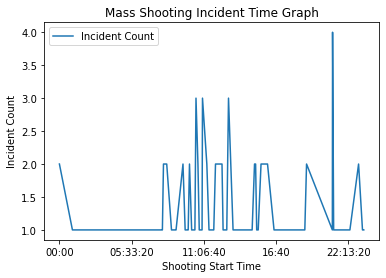

In [963]:
times = com_data[['Shooting Start Time']]
times = pd.to_datetime(times['Shooting Start Time'],format="%H:%M")
times = times.dropna()
times = times.apply(lambda d : d.time() )
times = times.to_frame()
times = times.value_counts()
times = times.to_frame()
times = times.reset_index()
times = times.rename(columns={0:'Incident Count'})
#times.plot(y="Shooting Start Time",x='Incident Count',kind='scatter')
#times
#sns.lineplot(data=times,x='Shooting Start Time',y='Incident Count',markers=True)
times.plot(x='Shooting Start Time',kind='line',title='Mass Shooting Incident Time Graph',ylabel='Incident Count')

([<matplotlib.axis.YTick at 0x7fcd42c69850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

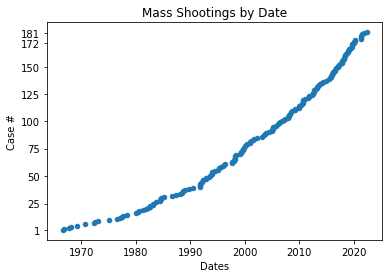

In [1058]:
dates = full_data.copy()
dates = dates[['Case #','Full Date']]
def fix_date(x):
    if x.year > 1989:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day)
dates = pd.to_datetime(dates['Full Date'])
dates[:6] = dates[:6].apply(fix_date)
dates = pd.DataFrame({'Dates':dates,
                     'Case #':full_data['Case #']})
dates.plot(x='Dates',y='Case #',kind='scatter',title='Mass Shootings by Date')
plt.yticks([0,24,49,74,99,124,148,170,179])

In [10]:
# Which factors had the highest impact on the number of victims injured/killed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

In [999]:
# No, legal = 0	System failure (background check missed something, records not reported) = 1	Straw purchase = 2	Lying and buying = 3	Illegal street sale = 4	Illegal but specific source unknown = 5	Legal sale but illegal possession = 6
fire_data
fire_data = fire_data.drop(fire_data.index[391:])

In [1000]:
legal = fire_data.copy()

In [1001]:
legal['Legal Purchase'].replace({0:'Illegal',
                               1:'Licensed Federal dealer',
                               2:'Unregulated private sale',
                               3:'Legal but source unknown'},inplace=True)
legal['Illegal Purchase'].replace({0:'Legal',
                                   1:'System failure (background check error)',
                                   2:'Straw purchase',
                                   3:'Lying and buying',
                                   4:'Illegal Street Sale',
                                   5:'Illegal Street Sale',
                                   6:'Legal sale/Illegal posession'},inplace=True)
legal_count = legal['Legal Purchase'].value_counts()
illegal_count = legal['Illegal Purchase'].value_counts()

In [1002]:
col_list = sns.color_palette("light:#5A9")

Text(0.5, 0, 'Purchase Method')

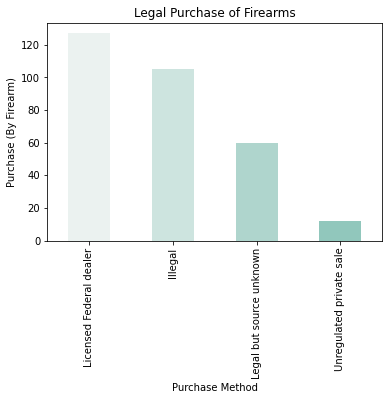

In [1003]:
#legal = fire_data['Legal Purchase']
legal_count.plot(kind='bar',color=col_list)
plt.title('Legal Purchase of Firearms')
plt.ylabel('Purchase (By Firearm)')
plt.xlabel('Purchase Method')

In [1004]:
col_list = sns.color_palette("ch:s=.25,rot=-.25")

Text(0.5, 0, 'Purchase Method')

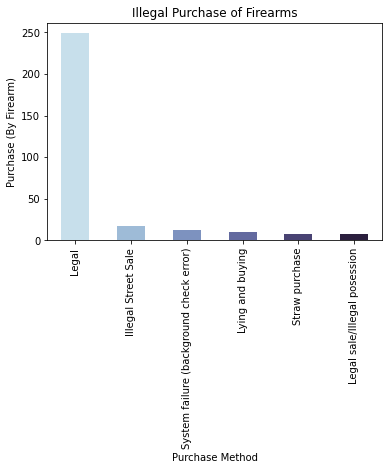

In [1006]:
illegal_count.plot(kind='bar',color=col_list)
plt.title('Illegal Purchase of Firearms')
plt.ylabel('Purchase (By Firearm)')
plt.xlabel('Purchase Method')

In [990]:
illegal_count

Legal                                                  249
Illegal Street Sale                                     17
System failure (background checks missed something)     12
Lying and buying                                        10
Straw purchase                                           7
Legal sale/Illegal posession                             7
Name: Illegal Purchase, dtype: int64

In [989]:
legal_count

Licensed Federal dealer              127
Illegal                              105
Legal but specific source unknown     60
Unregulated private sale              12
Name: Legal Purchase, dtype: int64

In [1014]:
dates = full_data.copy()
#dates = dates.loc[dates['Year']=='2021']
dates = dates['Month']

In [1015]:
dates.replace({1:'January',
               2:'February',
               3:'March',
               4:'April',
               5:'May',
               6:'June',
               7:'July',
               8:'August',
               9:'September',
               10:'October',
               11:'November',
               12:'December'},inplace=True)

In [1016]:
col_list = sns.color_palette()

Text(0, 0.5, 'Month')

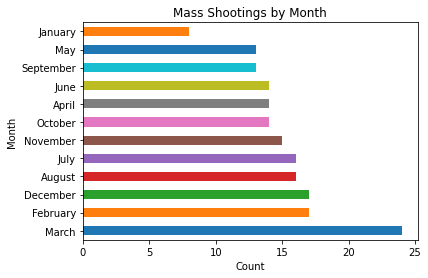

In [1017]:
#dates = dates[['Day','Month','Year']]
dates = dates.value_counts()
#x_axis = range(30)
#dates.plot(y='Day',x=x_axis,kind='hist')
dates.plot(kind='barh',color=col_list)
plt.title('Mass Shootings by Month')
plt.xlabel('Count')
plt.ylabel('Month')

Text(0, 0.5, 'Count')

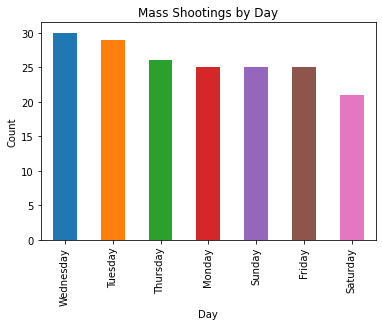

In [1012]:
days = full_data.copy()
days = days['Day of Week']
days = days.value_counts()
days.plot(kind='bar',color=col_list)
plt.title('Mass Shootings by Day')
plt.xlabel('Day')
plt.ylabel('Count')

In [1029]:
col_list = sns.color_palette("flare")

Text(0, 0.5, 'Count')

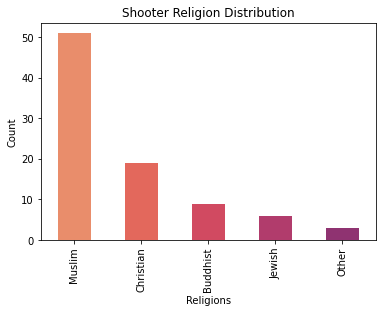

In [1030]:
#None = 0,Christian = 1,Muslim = 2,Buddhist = 3,Cultural spirituality/other = 4,Jewish = 5
religion = full_data.copy()
religion = religion['Religion']
religion.replace({0:'Christian',
                  1:'Muslim',
                  2:'Buddhist',
                  3:'Other',
                  4:'Jewish'},inplace=True)
religion = religion.value_counts()
religion.plot(kind='bar',color = col_list)
plt.title('Shooter Religion Distribution')
plt.xlabel('Religions')
plt.ylabel('Count')

In [1023]:
col_list = sns.color_palette()

Text(0.5, 1.0, 'Shooter Gender Distribution')

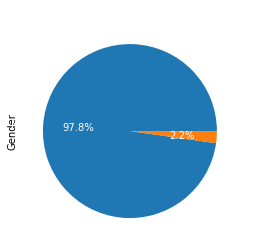

In [1027]:
gen = full_data.copy()
gen = gen['Gender']
gen = gen.replace({0:'Male',
                   1:'Female'})
gen = gen.value_counts()
gen.plot(kind='pie',colors=col_list,textprops={'color':"w"},autopct="%1.1f%%")
plt.title('Shooter Gender Distribution',color='w')

In [1130]:
gen = full_data.copy()
gen = gen['Gender']
gen = gen.replace({0:'Male',
                   1:'Female'})

In [1131]:
# random_gen = []
# for random in gen:
#     random_gen = random_gen.append(random)
gen = gen.sample(n=18)
gen

15     Male
72     Male
95     Male
146    Male
82     Male
23     Male
109    Male
71     Male
77     Male
79     Male
59     Male
66     Male
68     Male
38     Male
56     Male
98     Male
52     Male
120    Male
Name: Gender, dtype: object

In [1132]:
gen = gen.value_counts()
count_1 = gen[0]
count_1

18

In [1137]:
count_1 = count_1/18
count_1

0.05555555555555555

In [1138]:
proportions_ztest(9,18,value=count_1)

(3.7712361663282534, 0.00016244084518680075)

In [1088]:
proportions_ztest?

Signature:
proportions_ztest(
    count,
    nobs,
    value=None,
    alternative='two-sided',
    prop_var=False,
)
Docstring:
Test for proportions based on normal (z) test

Parameters
----------
count : {int, array_like}
    the number of successes in nobs trials. If this is array_like, then
    the assumption is that this represents the number of successes for
    each independent sample
nobs : {int, array_like}
    the number of trials or observations, with the same length as
    count.
value : float, array_like or None, optional
    This is the value of the null hypothesis equal to the proportion in the
    case of a one sample test. In the case of a two-sample test, the
    null hypothesis is that prop[0] - prop[1] = value, where prop is the
    proportion in the two samples. If not provided value = 0 and the null
    is prop[0] = prop[1]
alternative : str in ['two-sided', 'smaller', 'larger']
    The alternative hypothesis can be either two-sided or one of the one-
    sided te

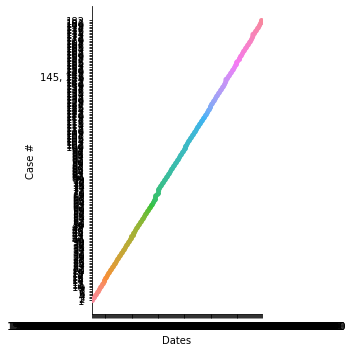

In [1041]:
#dates
sns.catplot(x = 'Dates',y = 'Case #',data = dates)
#plt.xticks(1966,2022)

Text(0, 0.5, 'Count')

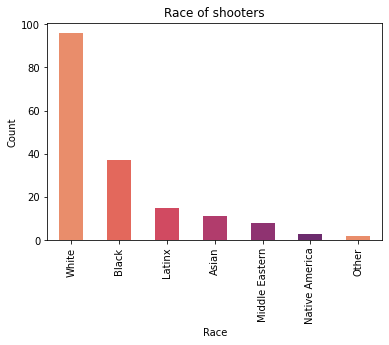

In [1055]:
# White = 0	Black = 1	Latinx = 2	Asian = 3	Middle Eastern = 4	Native American = 5	Other = 6
race = full_data.copy()
race = race['Race']
race = race.replace({0:'White',
              1:'Black',
              2:'Latinx',
              3:'Asian',
              4:'Middle Eastern',
              5:'Native America',
              6:'Other'})
race = race.value_counts()
race.plot(kind='bar',color=col_list)
plt.title('Race of shooters')
plt.xlabel('Race')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

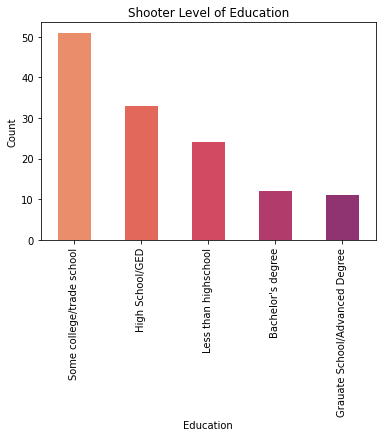

In [1056]:
#Less than high school = 0	High school/GED = 1	Some college/trade school = 2,Bachelor's degree = 3,Graduate school/advanced degree = 4
education = full_data.copy()
education = education['Education']
education = education.replace({0:'Less than highschool',
                   1:'High School/GED',
                   2:'Some college/trade school',
                   3:"Bachelor's degree",
                   4:'Grauate School/Advanced Degree'})
education = education.value_counts()
education.plot(kind='bar',color=col_list)
plt.title('Shooter Level of Education')
plt.xlabel('Education')
plt.ylabel('Count')

In [1147]:
col_list = sns.color_palette()

In [1151]:
knew = vict_data.copy()
knew = knew['Knew Shooter']
knew = knew.replace({0:'No Evidence',
                     1:'Yes',
                     2:'Likely'})
knew = knew.value_counts()
# knew
knew.plot(kind='bar',color=col_list)
plt.title('Victim Shooter Familiarity')
plt.xlabel('Relationship Status')
plt.ylabel('Count')

No Evidence    694
Yes            434
Likely         134
Name: Knew Shooter, dtype: int64